<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de 8 puntos, Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 13 de marzo a las 10:00 am. Evite el uso de inteligencia artificial y realice un análisis cuidadoso de los errores.



(80 %) En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



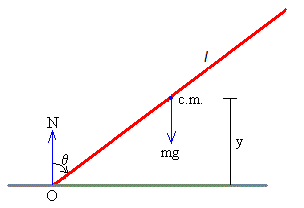


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?




### Matrices: Rotación  en el plano, autovalores y autovectores
8 (20%).   Considere la siguiente matrix de rotación:
\begin{bmatrix}
\cos \theta & -\sin \theta\\
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución.

Encontrar los autovalores y autovectores para $\theta=45$.
**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint

#Lapiz
\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

In [ ]:
def lapiz(y, t, g, l):
    theta0 = y[0]
    omega0 = y[1]

    dtheta = omega0
    domega = ( ((2 * g / l) - (dtheta ** 2 * np.cos(theta0)))  / ((1. / 3) + np.sin(theta0)**2) ) * np.sin(theta0)
    return np.array([dtheta, domega])

In [ ]:
y = np.array([np.pi / 12, 0])
g = 9.8 # m / s**2
l = 0.1 # m

t = np.linspace(0, 1, 1000)
params = (g, l)

solucion = odeint(lapiz, y, t, args = params)

pos_ang = solucion[:, 0]
vel_ang = solucion[:, 1]
pos_cmasa = 0.5 * np.cos(pos_ang)

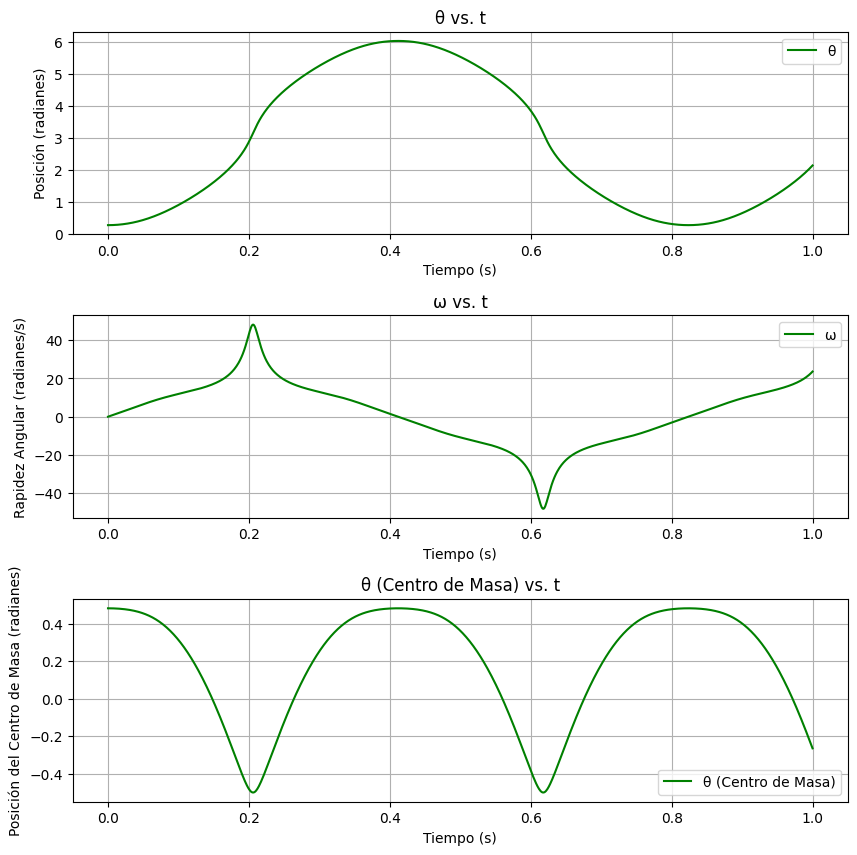

In [ ]:
# GRÁFICAS
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4)

axs[0].plot(t, pos_ang, color='green', label="θ")
axs[0].set_title("θ vs. t")
axs[0].set_ylabel("Posición (radianes)")
axs[0].set_xlabel("Tiempo (s)")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t, vel_ang, color='green', label="ω")
axs[1].set_title("ω vs. t")
axs[1].set_ylabel("Rapidez Angular (radianes/s)")
axs[1].set_xlabel("Tiempo (s)")
axs[1].grid(True)
axs[1].legend()

axs[2].plot(t, pos_cmasa, color='green', label="θ (Centro de Masa)")
axs[2].set_title("θ (Centro de Masa) vs. t")
axs[2].set_ylabel("Posición del Centro de Masa (radianes)")
axs[2].set_xlabel("Tiempo (s)")
axs[2].grid(True)
axs[2].legend()

Como se evidencia en el gráfico, puesto que las ecuaciones diferenciales tienen términos sinusoidales, el comportamiento de las gráficas es cíclico. Entonces, la solución debe estar limitada al intervalo de tiempo en el que sucede el fenómeno. Este intervalo es, aproximadamente, $0 \le t \le 0.2$

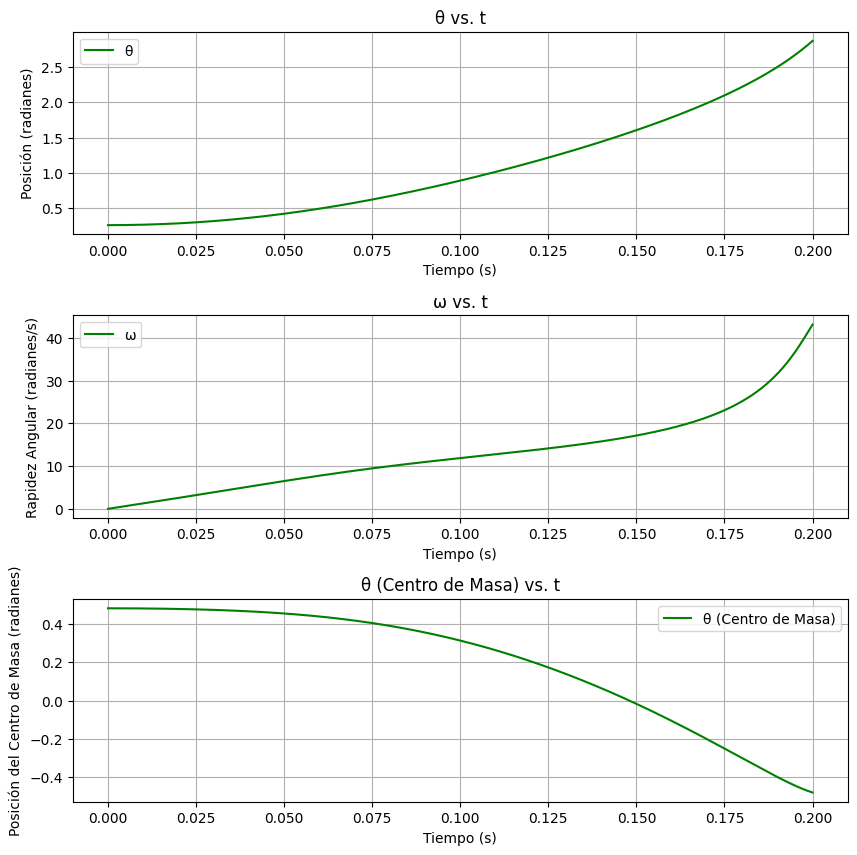

In [ ]:
y = np.array([np.pi / 12, 0])
g = 9.8 # m / s**2
l = 0.1 # m

t = np.linspace(0, 0.2, 1000)
params = (g, l)

solucion = odeint(lapiz, y, t, args = params)

pos_ang = solucion[:, 0]
vel_ang = solucion[:, 1]
pos_cmasa = 0.5 * np.cos(pos_ang)

# GRÁFICAS
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4)

axs[0].plot(t, pos_ang, color='green', label="θ")
axs[0].set_title("θ vs. t")
axs[0].set_ylabel("Posición (radianes)")
axs[0].set_xlabel("Tiempo (s)")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t, vel_ang, color='green', label="ω")
axs[1].set_title("ω vs. t")
axs[1].set_ylabel("Rapidez Angular (radianes/s)")
axs[1].set_xlabel("Tiempo (s)")
axs[1].grid(True)
axs[1].legend()

axs[2].plot(t, pos_cmasa, color='green', label="θ (Centro de Masa)")
axs[2].set_title("θ (Centro de Masa) vs. t")
axs[2].set_ylabel("Posición del Centro de Masa (radianes)")
axs[2].set_xlabel("Tiempo (s)")
axs[2].grid(True)
axs[2].legend()

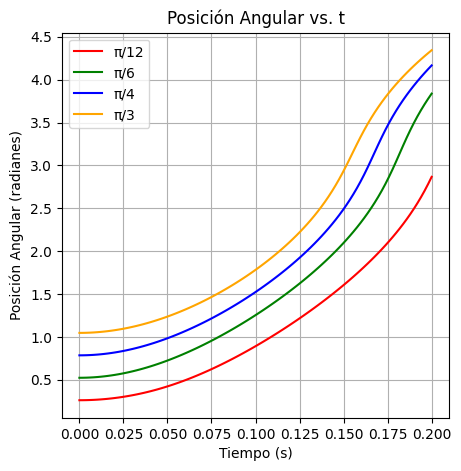

In [ ]:
condiciones = [
  np.array([np.pi / 12, 0]),
  np.array([np.pi / 6, 0]),
  np.array([np.pi / 4, 0]),
  np.array([np.pi / 3, 0])
]
angles = ["π/12", "π/6", "π/4", "π/3"]
colors = ["red", "green", "blue", "orange"]
plt.figure(figsize=(5, 5))

for i, y in enumerate(condiciones):
  solucion = odeint(lapiz, y, t, args=params)
  pos_ang = solucion[:, 0]
  plt.plot(t, pos_ang, label=angles[i], color=colors[i])

plt.xlabel("Tiempo (s)")
plt.ylabel("Posición Angular (radianes)")
plt.title("Posición Angular vs. t")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from scipy.optimize import root_scalar
from scipy.interpolate import interp1d

In [ ]:
for i, y in enumerate(condiciones):
    solucion = odeint(lapiz, y, t, args=params)
    pos_ang_i = solucion[:,0]
    pos_cmasa = 0.5 * np.cos(pos_ang_i)
    interpolacion = interp1d(t, pos_cmasa, 'cubic')
    raiz = root_scalar(interpolacion, bracket=[0, 0.2], method='brentq').root
    print(f'Raiz para θ={angles[i]}, t={raiz}s')

Raiz para θ=π/12, t=0.14798323613431166s
Raiz para θ=π/6, t=0.12177877376847152s
Raiz para θ=π/4, t=0.10332124449032859s
Raiz para θ=π/3, t=0.08416005007325206s



\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

In [ ]:
from scipy.integrate import quad

In [ ]:
def integral(theta, theta0):
    return np.sqrt(((1./3) + np.sin(theta)**2) / (np.cos(theta0) - np.cos(theta)))

theta0_values = [np.pi/12, np.pi/6, np.pi/4, np.pi/3]

for theta0 in theta0_values:
  sol, _ = quad(integral, theta0, np.pi/2, args=(theta0,))
  T = 0.5 * np.sqrt(l / g) * sol
  print(f"Para θ={theta0}, T = {T} s")

Para θ=0.2617993877991494, T = 0.1479832354352146 s
Para θ=0.5235987755982988, T = 0.12177877486181128 s
Para θ=0.7853981633974483, T = 0.10332124464084698 s
Para θ=1.0471975511965976, T = 0.08416005040768007 s


Se verifican las raíces encontradas numéricamente

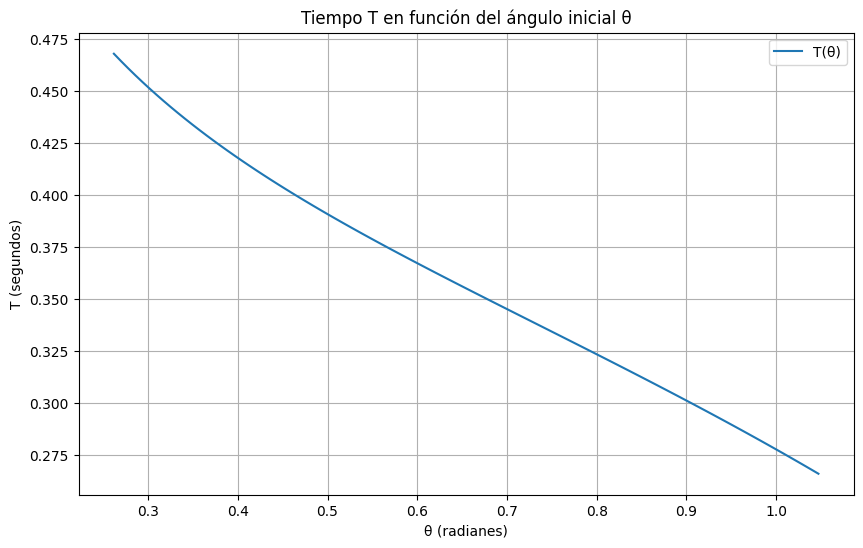

In [154]:
theta0_values = np.linspace(np.pi/12, np.pi/3, 100)
T_values = []

for theta0 in theta0_values:
  sol, _ = quad(integral, theta0, np.pi/2, args=(theta0,))
  T = 0.5 * np.sqrt(1 / g) * sol
  T_values.append(T)

plt.figure(figsize=(10, 6))
plt.plot(theta0_values, T_values, label='T(θ)')
plt.xlabel('θ (radianes)')
plt.ylabel('T (segundos)')
plt.title('Tiempo T en función del ángulo inicial θ')
plt.legend()
plt.grid(True)
plt.show()

#Matrices
\begin{bmatrix}
\cos \theta & -\sin \theta\\
\sin \theta & \cos \theta
\end{bmatrix}

In [ ]:
import sympy as sy

In [ ]:
theta = sy.Symbol("θ")
matrix = sy.Matrix([
[sy.cos(theta),      -sy.sin(theta)],
[sy.sin(theta), sy.cos(theta)]])

matrix

Matrix([
[cos(θ), -sin(θ)],
[sin(θ),  cos(θ)]])

In [ ]:
poly = matrix.charpoly(theta)
sy.factor(poly.as_expr())

_θ**2 - 2*_θ*cos(θ) + 1

In [ ]:
autovectores = matrix.eigenvects()
display(autovectores)

[(-sqrt((cos(θ) - 1)*(cos(θ) + 1)) + cos(θ),
  1,
  [Matrix([
   [sin(θ)/sqrt(cos(θ)**2 - 1)],
   [                         1]])]),
 (sqrt((cos(θ) - 1)*(cos(θ) + 1)) + cos(θ),
  1,
  [Matrix([
   [-sin(θ)/sqrt(cos(θ)**2 - 1)],
   [                          1]])])]

In [ ]:
diagonalizacion = matrix.diagonalize()
display(sy.Matrix(diagonalizacion))

Matrix([
[                  sin(θ)/sqrt(-sin(θ)**2),                 -sin(θ)/sqrt(-sin(θ)**2)],
[                                        1,                                        1],
[-sqrt((cos(θ) - 1)*(cos(θ) + 1)) + cos(θ),                                        0],
[                                        0, sqrt((cos(θ) - 1)*(cos(θ) + 1)) + cos(θ)]])

Para $θ=45°$

In [ ]:
matrix45 = sy.Matrix([
[sy.cos(np.pi/4),      -sy.sin(np.pi/4)],
[sy.sin(np.pi/4), sy.cos(np.pi/4)]])
matrix45

Matrix([
[0.707106781186548, -0.707106781186547],
[0.707106781186547,  0.707106781186548]])

In [ ]:
poly45 = matrix45.charpoly()
sy.factor(poly45.as_expr())

1.4142135623731*(0.707106781186547*lambda**2 - 1.0*lambda + 0.707106781186547)

In [ ]:
autovectores45 = matrix45.eigenvects()
display(autovectores45)

[(0.707106781186548 - 0.707106781186547*I,
  1,
  [Matrix([
   [-0.707106781186548*I],
   [   0.707106781186548]])]),
 (0.707106781186548 + 0.707106781186547*I,
  1,
  [Matrix([
   [ -0.707106781186548],
   [0.707106781186548*I]])])]

In [ ]:
diagonalizacion45 = matrix45.diagonalize()
display(sy.Matrix(diagonalizacion45))

Matrix([
[                   -0.707106781186548*I,                      -0.707106781186548],
[                      0.707106781186548,                     0.707106781186548*I],
[0.707106781186548 - 0.707106781186547*I,                                       0],
[                                      0, 0.707106781186548 + 0.707106781186547*I]])